In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c dataquest-challenge-1

  0% 0.00/413k [00:00<?, ?B/s]
100% 413k/413k [00:00<00:00, 138MB/s]


In [ ]:
!unzip dataquest-challenge-1.zip


Archive:  dataquest-challenge-1.zip
  inflating: SampleSubmission.csv    
  inflating: extra_data/extra_data/CONSOMMATION D_EAU POTABLE GLOBALE ANNUELLE PAR USAGE ET PAR R�GION EN 1000 M�TRE CUBE/c-e-p-u-2007.xlsx  
  inflating: extra_data/extra_data/CONSOMMATION D_EAU POTABLE GLOBALE ANNUELLE PAR USAGE ET PAR R�GION EN 1000 M�TRE CUBE/c-e-p-u-2008.xlsx  
  inflating: extra_data/extra_data/CONSOMMATION D_EAU POTABLE GLOBALE ANNUELLE PAR USAGE ET PAR R�GION EN 1000 M�TRE CUBE/c-e-p-u-2009.xlsx  
  inflating: extra_data/extra_data/CONSOMMATION D_EAU POTABLE GLOBALE ANNUELLE PAR USAGE ET PAR R�GION EN 1000 M�TRE CUBE/c-e-p-u-2010.xlsx  
  inflating: extra_data/extra_data/CONSOMMATION D_EAU POTABLE GLOBALE ANNUELLE PAR USAGE ET PAR R�GION EN 1000 M�TRE CUBE/c-e-p-u-2011.xlsx  
  inflating: extra_data/extra_data/CONSOMMATION D_EAU POTABLE GLOBALE ANNUELLE PAR USAGE ET PAR R�GION EN 1000 M�TRE CUBE/c-e-p-u-2012.xlsx  
  inflating: extra_data/extra_data/CONSOMMATION D_EAU POTABLE GLOBALE ANNU

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('Solarize_Light2')

In [ ]:

train_data = pd.read_csv('train.csv', parse_dates=['date'])
test_data = pd.read_csv('test.csv', parse_dates=['date'])
weather_data = pd.read_csv('weather.csv', parse_dates=['date'])
sample_submission = pd.read_csv('SampleSubmission.csv', parse_dates=['date'])


In [ ]:
train_data.head()

,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN


In [ ]:
print(f'Training data shape: {train_data.shape}')
print(f'Testing data shape: {test_data.shape}')
print(f'Weather data shape: {weather_data.shape}')
print()
print(f'The training data contains water levels from {train_data["date"].min()} to {train_data["date"].max()}')
print(f'The testing data contains water levels from {test_data["date"].min()} to {test_data["date"].max()}')
print(f'The weather data contains data from {weather_data["date"].min()} to {weather_data["date"].max()}')

Training data shape: (1400, 29)
Testing data shape: (366, 1)
Weather data shape: (1978, 11)

The training data contains water levels from 2014-01-08 00:00:00 to 2019-02-05 00:00:00
The testing data contains water levels from 2019-02-06 00:00:00 to 2020-12-01 00:00:00
The weather data contains data from 2014-01-01 00:00:00 to 2019-06-01 00:00:00


In [ ]:
test_data.head()

,date
0,2019-02-06
1,2019-02-07
2,2019-02-08
3,2019-02-09
4,2019-02-11


In [ ]:
weather_data.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [ ]:
sample_submission.head()

,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2019-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-02-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1400 non-null   datetime64[ns]
 1   MELLEGUE      1400 non-null   float64       
 2   BEN METIR     1400 non-null   float64       
 3   KASSEB        1400 non-null   float64       
 4   BARBARA       1400 non-null   float64       
 5   SIDI SALEM    1400 non-null   float64       
 6   BOU-HEURTMA   1400 non-null   float64       
 7   JOUMINE       1400 non-null   float64       
 8   GHEZALA       1400 non-null   float64       
 9   SEJNANE       1400 non-null   float64       
 10  S. EL BARRAK  1400 non-null   float64       
 11  SILIANA       1400 non-null   float64       
 12  LAKHMESS      1400 non-null   float64       
 13  RMIL          1400 non-null   float64       
 14  BIR M'CHERGA  1400 non-null   float64       
 15  RMEL          1400 non-null   float64 

In [ ]:
train_data.describe()

,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,S. EL BARRAK,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1396.000000,1396.000000,645.000000,645.000000
mean,20.159376,44.669804,52.788284,134.442034,207.956659,54.388894,44.632212,19.507215,130.207464,177.044771,...,1.224705,1.242792,2.643638,4.021929,2.845130,11.081281,10.293799,3.902624,17.386471,24.297374
std,9.074718,11.468745,13.115188,135.148529,178.302809,18.924842,30.355657,23.187480,91.907786,114.826834,...,1.123039,0.937399,1.365477,3.842209,1.616236,6.930118,14.123069,2.924067,9.981033,14.952133
min,4.228000,13.687000,29.528000,42.773000,23.153000,20.336000,2.618000,1.509000,34.498000,3.188000,...,0.201000,0.058000,0.789000,0.121000,0.570000,0.816000,0.636000,0.201000,-19.720000,-31.471000
25%,13.427750,38.444750,40.076000,57.355000,60.960750,40.065750,6.690750,4.868500,62.410000,8.457000,...,0.201000,0.591000,1.623000,0.938500,1.205000,5.052000,1.350000,1.157000,17.362000,22.520000
50%,20.767000,45.366500,55.932000,61.794500,141.088000,53.074000,48.181500,6.711000,86.828500,233.296000,...,1.157000,0.905000,2.183000,2.921000,2.772500,9.240000,2.120000,3.400000,20.152000,29.258000
75%,26.717000,54.442000,62.645000,126.006250,350.602250,66.037750,62.507000,34.228000,243.761500,275.649000,...,1.157000,2.050000,3.652750,4.911750,4.552000,17.398250,20.921500,5.530000,22.690000,31.973000
max,51.131000,63.353000,81.304000,429.730000,722.255000,120.918000,106.331000,76.519000,292.152000,307.021000,...,7.493000,5.130000,5.464000,12.217000,5.481000,29.690000,40.199000,10.167000,25.120000,35.640000


In [ ]:
train_data.isna().sum()

date              0
MELLEGUE          0
BEN METIR         0
KASSEB            0
BARBARA           0
SIDI SALEM        0
BOU-HEURTMA       0
JOUMINE           0
GHEZALA           0
SEJNANE           0
S. EL BARRAK      0
SILIANA           0
LAKHMESS          0
RMIL              0
BIR M'CHERGA      0
RMEL              0
NEBHANA           0
SIDI SAAD         0
EL HAOUAREB       0
SIDI AÏCH         0
EL BREK           0
BEZIRK            0
CHIBA             0
MASRI             0
LEBNA             0
HMA               4
ABID              4
Zarga           755
Ziatine         755
dtype: int64

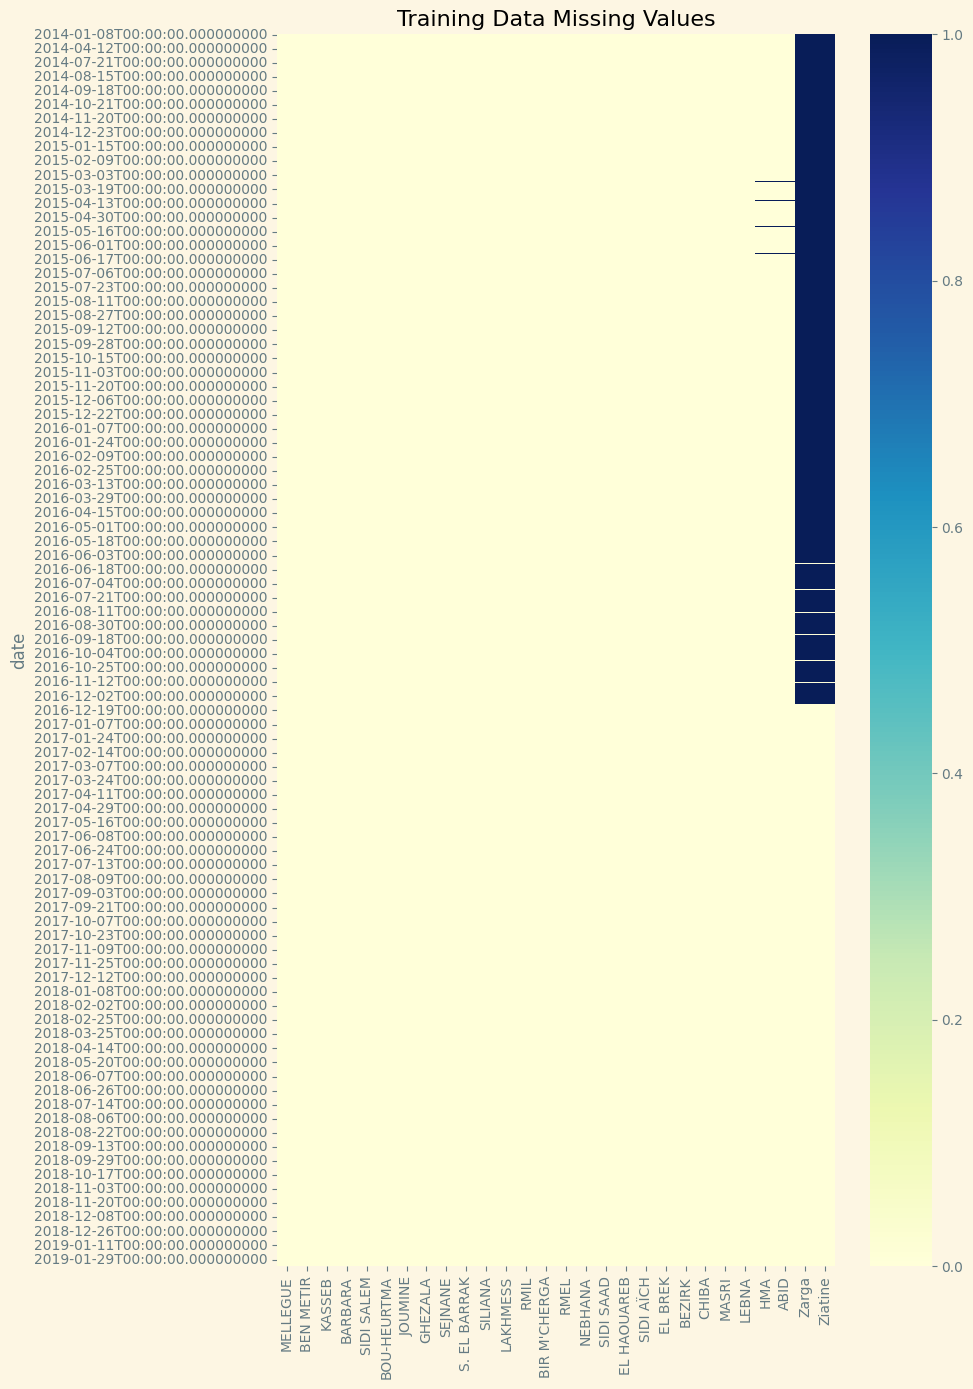

In [ ]:
plt.figure(figsize=(9, 16))
plt.title('Training Data Missing Values')
sns.heatmap(train_data.set_index('date').isna(), cmap='YlGnBu')
plt.show()

In [ ]:
train_data['date'].sort_values().diff().describe()

count                         1399
mean     1 days 07:48:20.071479628
std      1 days 21:35:31.361758584
min                0 days 00:00:00
25%                1 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max               29 days 00:00:00
Name: date, dtype: object

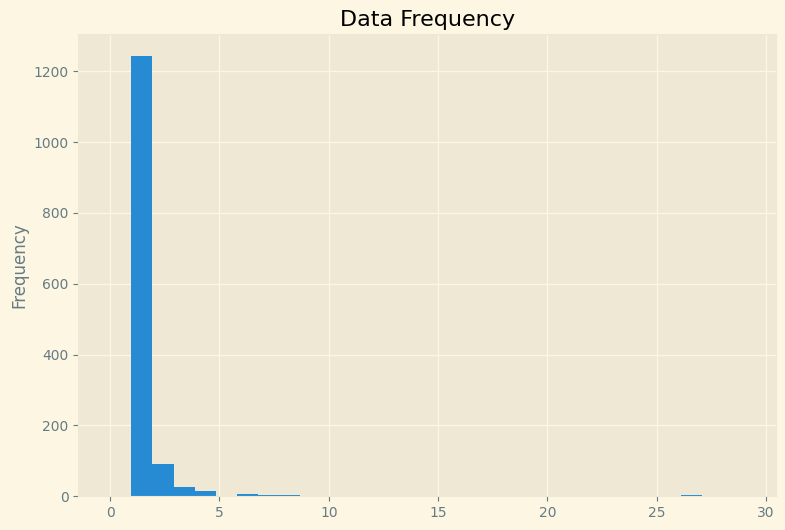

In [ ]:
plt.figure(figsize=(9, 6))
plt.title('Data Frequency')
train_data['date'].sort_values().diff().astype('timedelta64[D]').plot.hist(bins=30)
plt.xlabel('')
plt.show()

In [ ]:
train_data = train_data.groupby('date').mean().asfreq('d').interpolate(method='time')
train_data = train_data.rolling(30, center=True).mean()
train_data.head()

,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,S. EL BARRAK,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
date,,,,,,,,,,,,,,,,,,,,,
2014-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


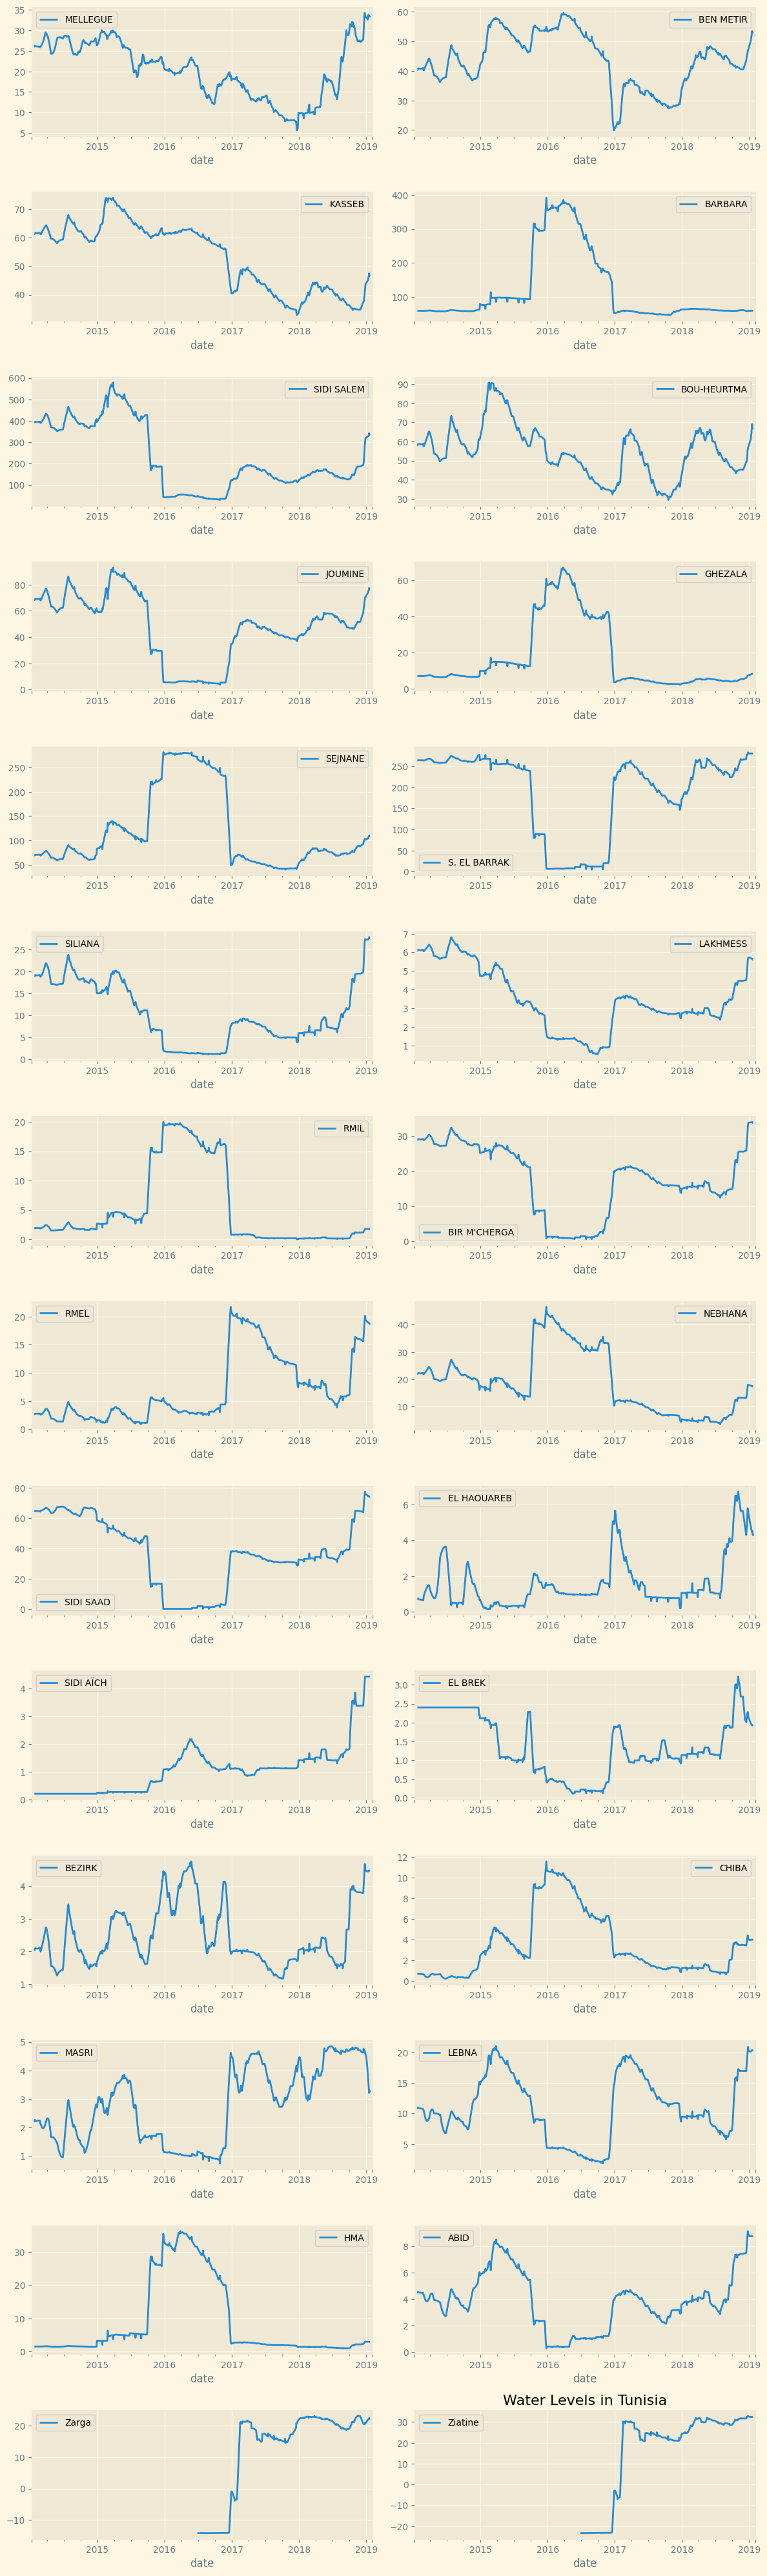

In [ ]:
fig, axes = plt.subplots(14, 2, figsize=(12, 40))
plt.title('Water Levels in Tunisia')
for index, target in enumerate(train_data.columns):
    i = index // 2
    j = index % 2
    train_data.plot(y=target, ax=axes[i, j])
    #rolling_train.plot(y=target+'_rolling_window', ax=axes[i, j], c='red')
plt.tight_layout()
plt.show()

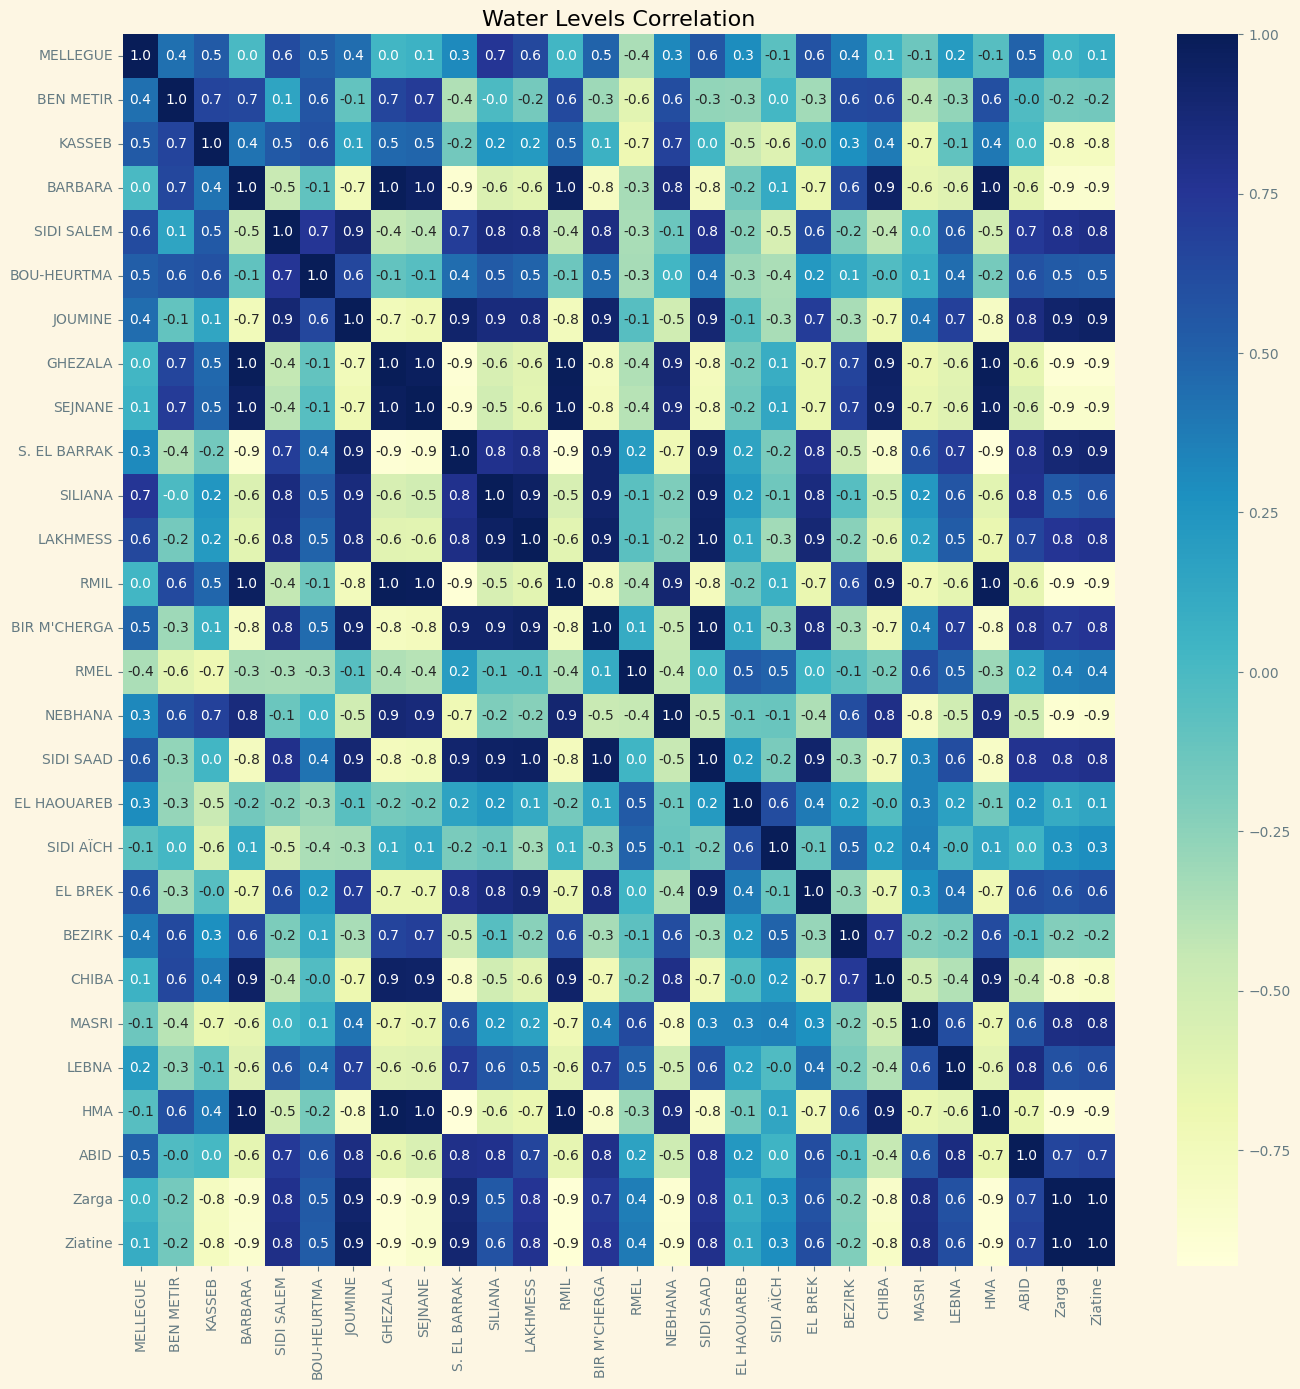

In [ ]:
plt.figure(figsize=(16, 16))
plt.title('Water Levels Correlation')
sns.heatmap(train_data.corr(), cmap='YlGnBu', annot=True, fmt='.1f')
plt.show()

In [ ]:
corr_matrix = train_data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

# Top 50 most correlated target features
sol.head(50)

Zarga         Ziatine         0.994145
GHEZALA       RMIL            0.990567
              HMA             0.988552
RMIL          HMA             0.985499
BARBARA       GHEZALA         0.985304
SEJNANE       RMIL            0.984261
BARBARA       HMA             0.984169
GHEZALA       SEJNANE         0.976210
BIR M'CHERGA  SIDI SAAD       0.975197
SEJNANE       HMA             0.971762
BARBARA       RMIL            0.965849
              SEJNANE         0.951805
LAKHMESS      SIDI SAAD       0.950800
SILIANA       LAKHMESS        0.948812
BARBARA       CHIBA           0.946759
GHEZALA       CHIBA           0.944204
JOUMINE       Ziatine         0.942199
LAKHMESS      BIR M'CHERGA    0.939903
SILIANA       SIDI SAAD       0.939832
CHIBA         HMA             0.937867
SEJNANE       CHIBA           0.932768
S. EL BARRAK  HMA             0.931953
RMIL          CHIBA           0.928999
JOUMINE       Zarga           0.923066
              BIR M'CHERGA    0.922828
              S. EL BARRA

In [ ]:
weather_copy = weather_data.copy()

In [ ]:
weather_data.isna().mean().sort_values(ascending=False)

snow    1.000000
wpgt    1.000000
tsun    1.000000
pres    0.485339
wdir    0.293731
wspd    0.159252
prcp    0.077856
tmin    0.047523
tmax    0.031850
date    0.000000
tavg    0.000000
dtype: float64

In [ ]:
weather_data = weather_copy.copy()
weather_data.drop(['snow', 'wpgt', 'tsun'], axis=1, inplace=True)

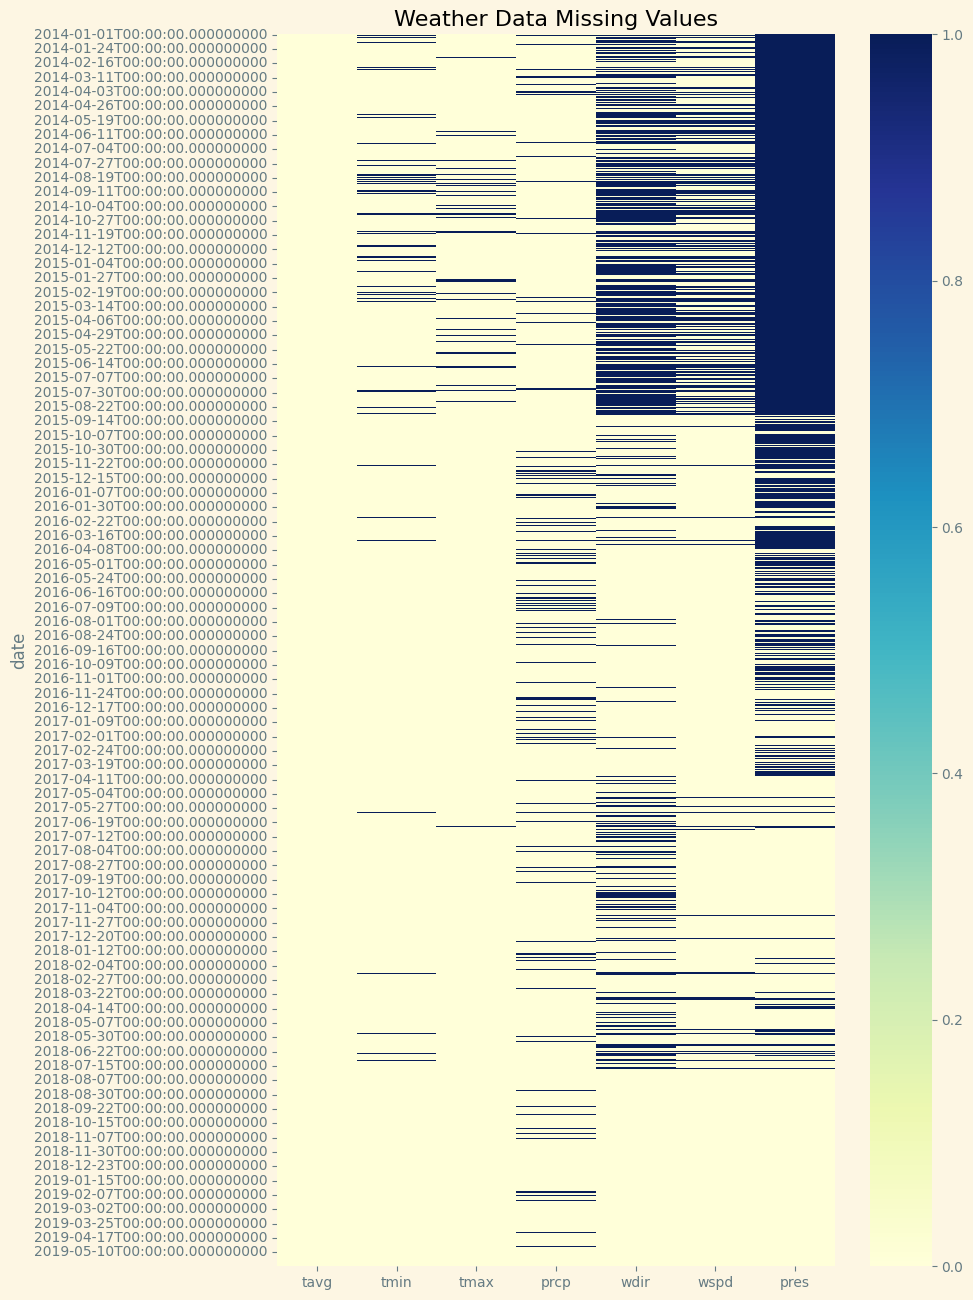

In [ ]:
plt.figure(figsize=(9, 16))
plt.title('Weather Data Missing Values')
sns.heatmap(weather_data.set_index('date').isna(), cmap='YlGnBu')
plt.show()

In [ ]:
weather_data.describe()

,tavg,tmin,tmax,prcp,wdir,wspd,pres
count,1978.000000,1884.000000,1915.000000,1824.00000,1397.000000,1663.000000,1018.000000
mean,18.806067,13.759926,25.855248,0.41080,147.866142,16.403548,1016.178487
std,6.949847,6.934710,8.182717,2.48288,95.944819,6.495765,6.963823
min,4.200000,-0.200000,6.800000,0.00000,1.000000,4.900000,943.600000
25%,12.525000,7.800000,18.800000,0.00000,72.000000,11.600000,1013.200000
50%,18.500000,13.800000,25.300000,0.00000,97.000000,15.300000,1015.750000
75%,25.000000,19.800000,31.800000,0.00000,242.000000,19.900000,1019.600000
max,38.300000,30.400000,46.500000,51.80000,359.000000,46.000000,1033.700000


In [ ]:
weather_data = weather_data.groupby('date').mean().asfreq('d').interpolate(method="time")

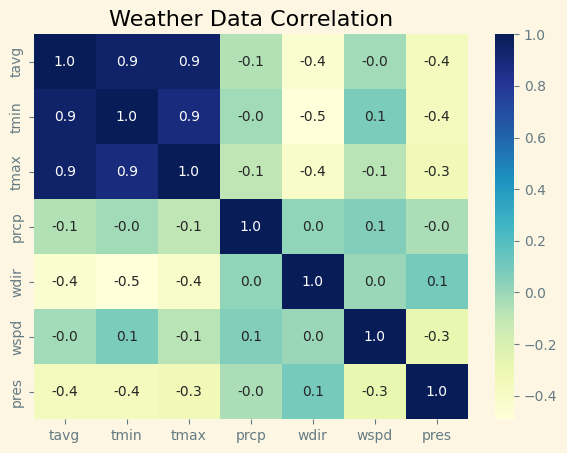

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Weather Data Correlation')
sns.heatmap(weather_data.corr(), cmap='YlGnBu', annot=True, fmt='.1f')
plt.show()

In [ ]:
train_weather_correlation = pd.DataFrame()
weather_data_temp = weather_data.loc[train_data.index.min()]
for target in train_data.columns:
    correlations = weather_data.corrwith(train_data[target])
    correlations.rename(target, inplace=True)
    train_weather_correlation = train_weather_correlation.append(correlations, ignore_index=False)

train_weather_correlation.head()

<ipython-input-32-303af94bc0e4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_weather_correlation = train_weather_correlation.append(correlations, ignore_index=False)
<ipython-input-32-303af94bc0e4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_weather_correlation = train_weather_correlation.append(correlations, ignore_index=False)
<ipython-input-32-303af94bc0e4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_weather_correlation = train_weather_correlation.append(correlations, ignore_index=False)
<ipython-input-32-303af94bc0e4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_weather_correlation = train_w

,tavg,tmin,tmax,prcp,wdir,wspd,pres
MELLEGUE,-0.086914,-0.063283,-0.036635,-0.001770,0.097969,0.002694,0.115796
BEN METIR,0.104369,0.078039,0.098464,-0.006823,-0.021276,0.030075,-0.110028
KASSEB,0.066640,0.092898,0.122282,-0.011556,-0.023542,0.034266,-0.052252
BARBARA,-0.041122,-0.089349,-0.091910,-0.005641,0.053737,-0.033221,-0.009017
SIDI SALEM,0.013310,0.074919,0.120837,-0.011230,0.000893,0.053952,0.108265


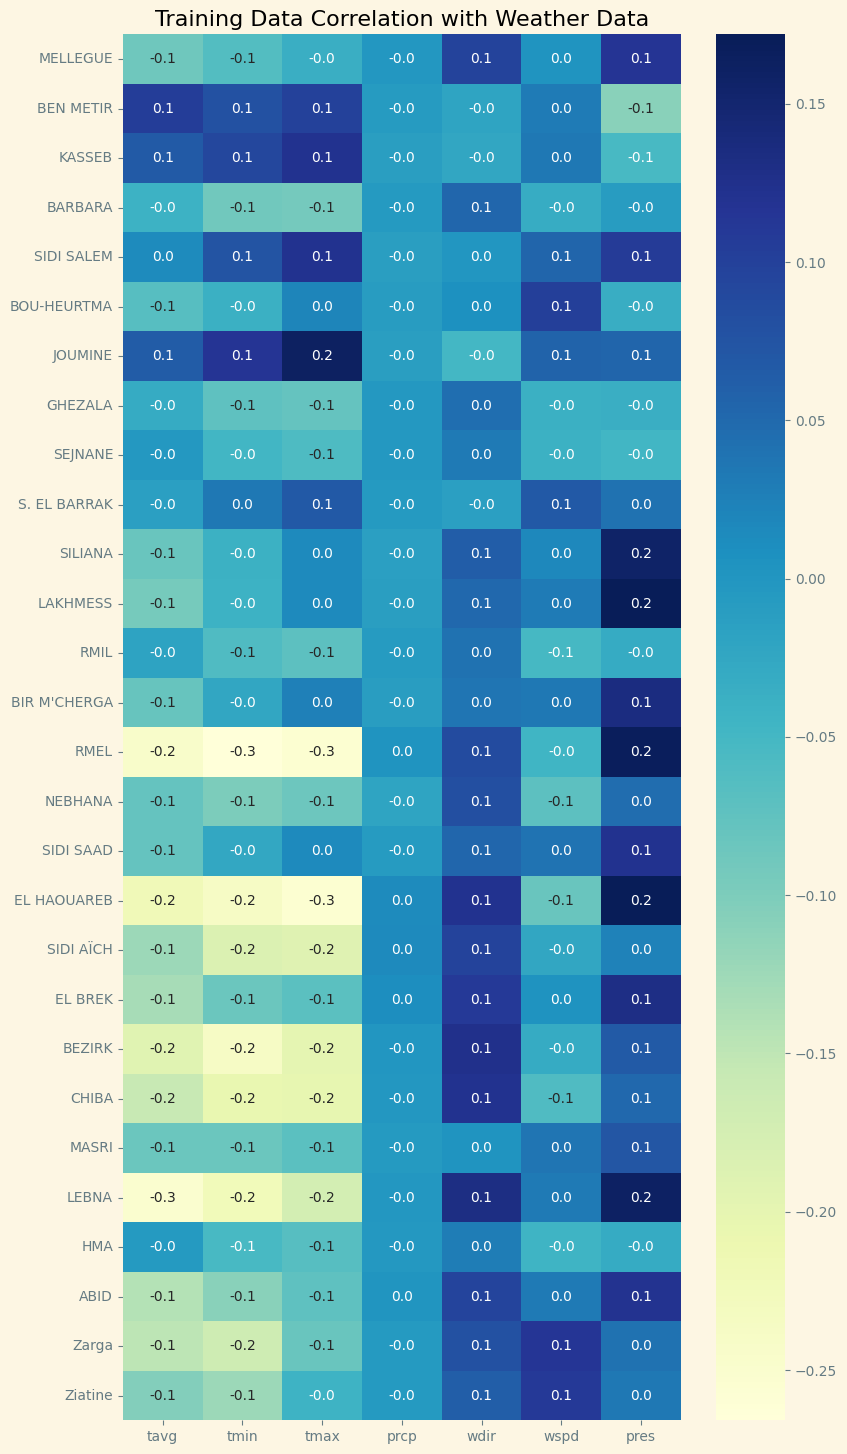

In [ ]:
plt.figure(figsize=(9, 18))
plt.title('Training Data Correlation with Weather Data')
sns.heatmap(train_weather_correlation, cmap='YlGnBu', annot=True, fmt='.1f')
plt.show()